# 分析ノートから始めるQuarto

# Atusy

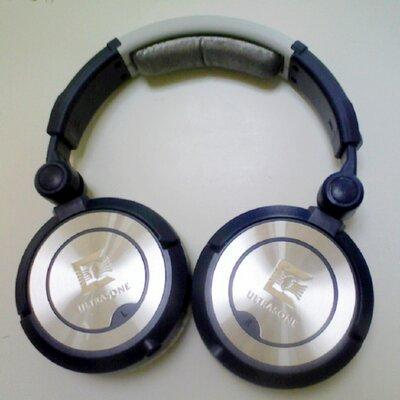

## 属性

-   Rパッケージ作ったりメンテしたり
    -   代表作
        -   [felp](https://felp.atusy.net)：Rのヘルプをもっと便利に
        -   [ftExtra](https://ftextra.atusy.net)：flextable ❤️ markdown
        -   [minidown](https://minidown.atusy.net)：Rmd →
            軽量＆高機能HTMLレポート
    -   関わり深いものに[knitr](https://yihui.org/knitr/)、[rmarkdown](https://rmarkdown.rstudio.com/)など
-   言語: R, Python, lua, bash, Go, TypeScript, …
-   エディタ: Neovim

## 著書: [Rが生産性を高める](https://gihyo.jp/book/2022/978-4-297-12524-0)

[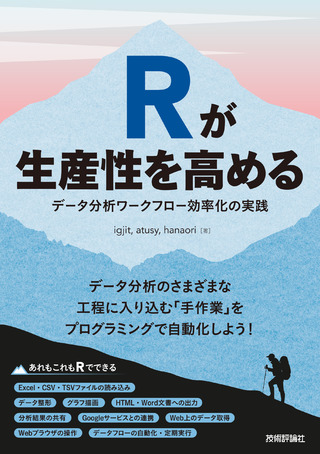](https://gihyo.jp/book/2022/978-4-297-12524-0)

## Links

-   blog: <https://blog.atusy.net>
-   Twitter: <https://twitter.com/Atsushi776>
-   GitHub: <https://github.com/atusy>

# 分析用Rスクリプトあるある

-   分析結果を管理しにくい
-   考察を管理しにくい
-   人に共有しにくい

Rスクリプトは関数の実装などに使った方がいい

## 分析結果を管理しにくい

-   保存先をどこにしよう？
-   保存されたファイルを信用できるか？
    -   最新か？
    -   再現性はあるか？
    -   ファイル名変更に伴うゴミファイルと区別できるか？

## 考察を書きにくい

-   どこに書こう？
    -   コードコメント？
    -   分析結果に埋め込み？
    -   新しいファイル？
-   すぐ書ける場所がないと揮発する

## 人に共有しにくい

-   Wordやパワポに貼る……？
    -   更新のたびに貼りなおし

この辺のことは[Rが生産性を高める](https://gihyo.jp/book/2022/978-4-297-12524-0)に書いた

[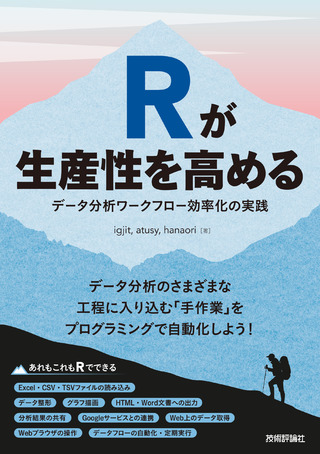](https://gihyo.jp/book/2022/978-4-297-12524-0)

## 悲惨な分析状況の例

     📁 docs
     └── mtcars.docx             # output を反映したレポート……のつもりだったもの

     📁 output
     ├── mtcars-summary.csv
     ├── mtcars-wt-vs-mpg.png    # 中身は凡例を読みやすくする前のバージョンのまま
     └── summary.csv             # mtcars-summary.csv に改名して不要になったゴミ

     📁 R
     └── mtcars.R                # 肥大化して mtcars.docx を見ないと
                                   コードごとの分析目的や知見がわからない……
                                   どころか mtcars.docx が腐ってて何もわからない

## Rスクリプトの使いどころ

関数定義はRスクリプトに分離した方がいいことも多い

-   `source()`で複数のqmdファイルから使い回せる
-   実装と分析が分離することで可読性が向上する
-   パッケージ化すればテストも実装しやすい
    -   バイトコンパイルによる高速化も期待できる

# そこでQuarto

<https://quarto.org/>

## 雰囲気をつかもう

ソース (qmd)

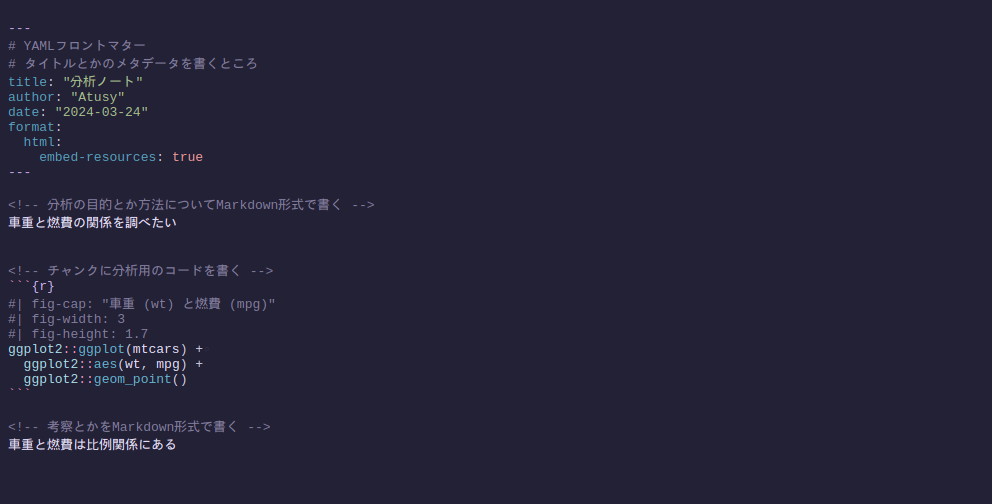

出力 (HTML)

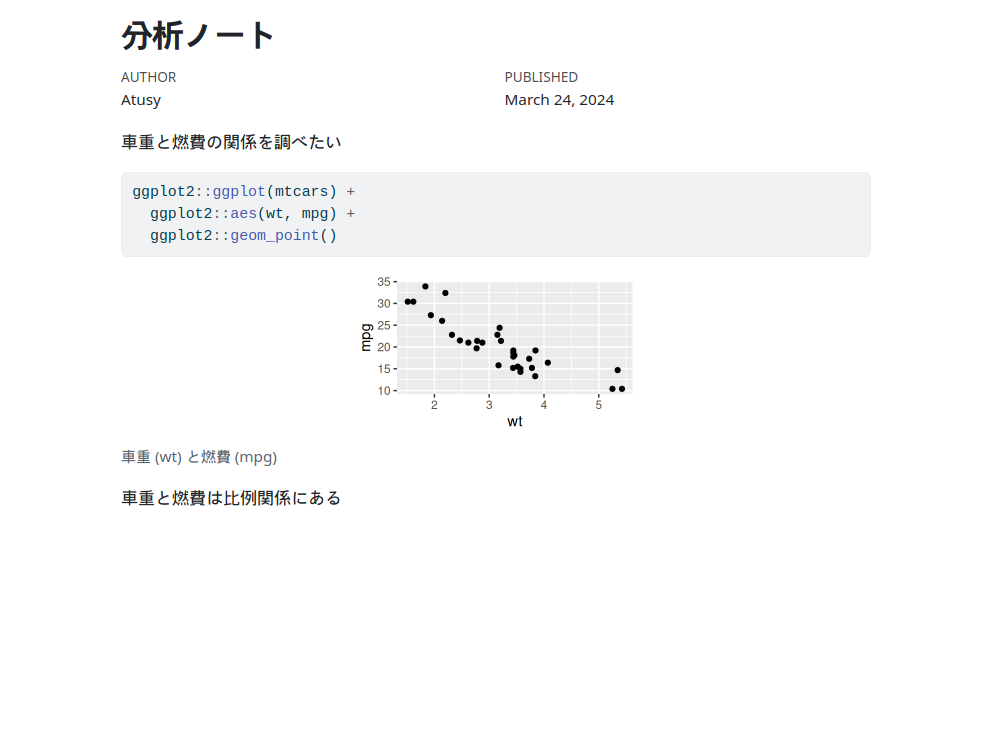

## Quartoで分析ノートを書く

-   ソース（qmd）でコードと分析目的や考察を一括管理
    -   プレインテキストで読みやすい
-   出力（HTML）に分析結果を追加
    -   最新性・再現性・参照性を確保

# qmdファイルを書く

## qmdファイルとは……？

-   **YAMLフロントマター**
    -   タイトルや出力形式などのメタデータ
-   **チャンク**
    -   コードのかたまり
    -   実行結果が出力に反映される
-   **文章**
    -   分析の目的とか考察とか

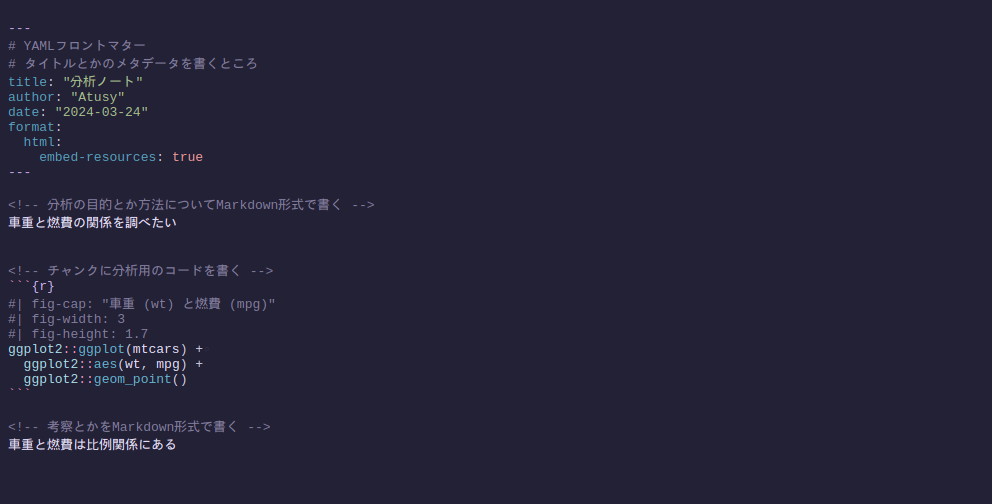

## YAMLフロントマター

ドキュメント冒頭の`---`で区切られたメタデータ

分析ノートとしては↓を覚えておけばOK

``` yaml
---
title: "分析ノート"
author: "Atusy"
date: "2024-03-24"
format:
  html:
    embed-resources: true
---
```

💡
`embed-resources: true`を使うと、画像などがHTMLファイルに埋め込まれるため人と共有しやすい

## チャンク

ドキュメント中の`{r}と`で囲われた領域

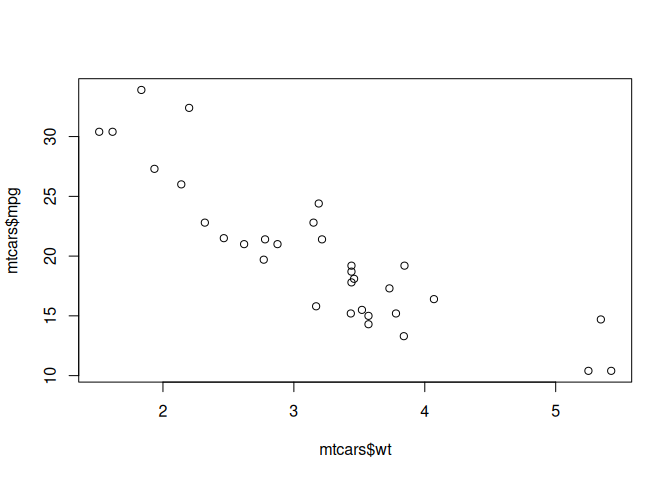

In [ ]:
```{r}
plot(mtcars$wt, mtcars$mpg)
```

## チャンクオプション

図のサイズなどを調整するオプション。

チャンク冒頭の`#|`で始まるコメント内にYAMLで記述。

`fig-width`と`fig-height`は覚えておきたい。

In [ ]:
```{r}
#| fig-width: 4
#| fig-height: 4
plot(mtcars$wt, mtcars$mpg)
```

オプション一覧: <https://yihui.org/knitr/options/>

<small>歴史的経緯によりオプション名は`fig.width`などのドット区切りになっているが、Quartoでは`fig-width`のようなハイフン区切りを推奨。</small>

## 文章

Markdown記法を用いて分析の目的や考察などを記述。

``` markdown
# 見出し1

## 見出し1.1

段落。**太字**とか[リンク](https://example.com)とか使える

- 箇条書き
- 記法いろいろ
  - ![画像](example.png)
  - `code`
  - ...
```

# HTMLに出力する

``` r
quarto::quarto_render("example.qmd")
```

で**example.html**が生成される

RStudioなら<kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>K</kbd>

# RStudioで始めるQuarto

覚えること多すぎ……💢

更にQuartoのセットアップ方法も覚えるの……？

と思った人もRStudioで始めてみよう

便利機能もいっぱい

## RStudioで楽々セットアップ

-   **とりあえずqmdファイルを作ればOK**
    -   *File* → *New File* → *Quarto Document…*
-   **必要なパッケージのインストールを促してくれる**
    -   qmdファイル内で読み込んでるパッケージも対象

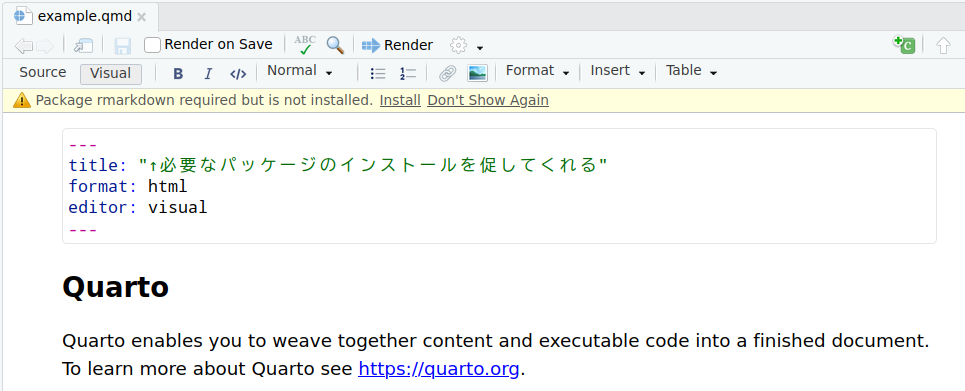

## RStudioで覚えることを最小化

-   補完が便利<small style="vertical-align: baseline">（コード・チャンクオプション・YAMLフロントマター）</small>

    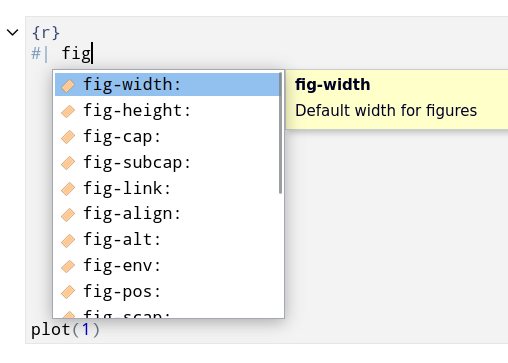

-   Visualエディタで記法の暗記とサヨナラ

    -   充実のメニューとスラッシュコマンド

-   コマンドパレットも便利（<kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>P</kbd>）

## RStudioでチャンクをプレビュー

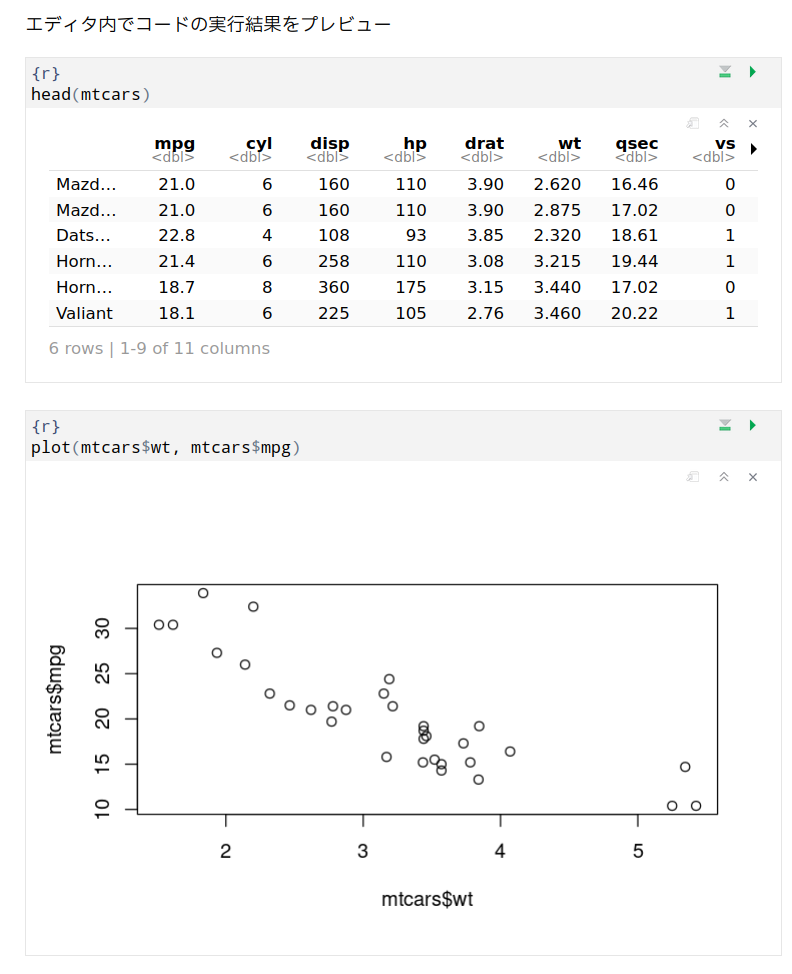

# 分析ノートにべんりなパッケージ

## **plotly**で作る対話的なグラフ

`ggplotly()`だけ覚えておけばOK  
<https://plotly.com/ggplot2/>

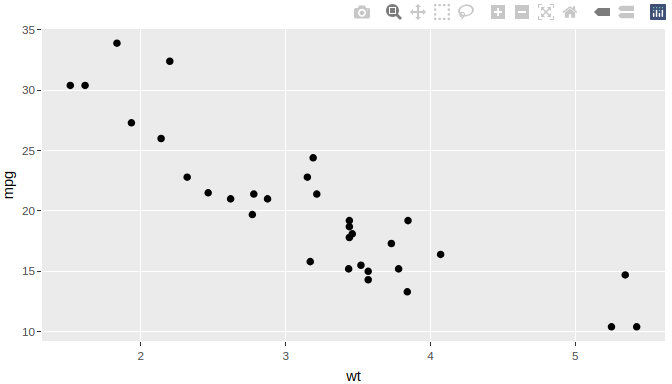

In [ ]:
g <- ggplot2::ggplot(mtcars, ggplot2::aes(wt, mpg)) + ggplot2::geom_point()
plotly::ggplotly(g)

## **leaflet**で作る対話的な地図

試料採取地点の確認などに  
<https://rstudio.github.io/leaflet/>

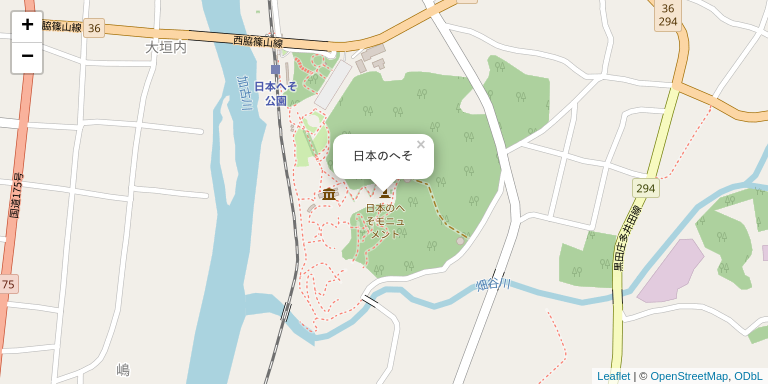

In [ ]:
leaflet::leaflet(data.frame(name = '日本のへそ', lng = 135, lat = 35)) |>
  leaflet::addTiles() |>
  leaflet::addPopups(lng = ~ lng, lat = ~ lat, popup = ~ name) |>
  leaflet::setView(lng = 135, lat = 35, zoom = 16)

## **DiagrammeR**で作るダイアグラム

<https://rich-iannone.github.io/DiagrammeR/>

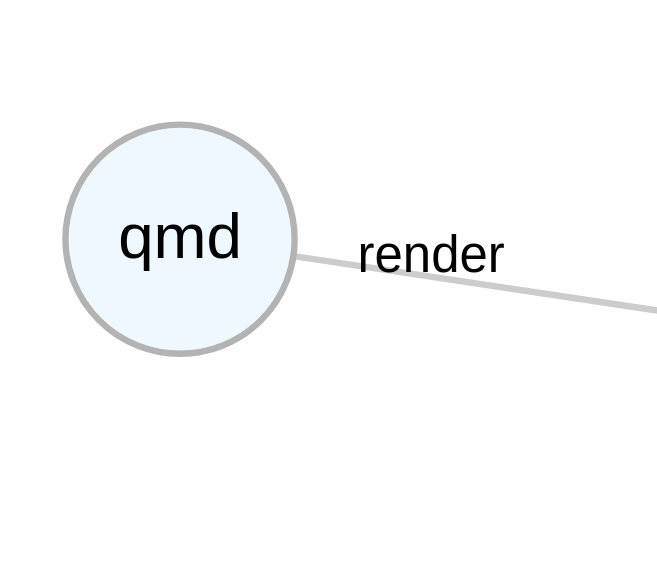

In [ ]:
library(DiagrammeR)
create_graph() %>%
  add_node(label = "qmd") %>%
  add_node(label = "html") %>%
  add_edge(from = "qmd", to = "html", edge_aes = edge_aes(label = "render")) |>
  render_graph()

## **reactable**で作る表

いつでも生データは大事  
そこそこ凝ったこともできる  
<https://glin.github.io/reactable/>

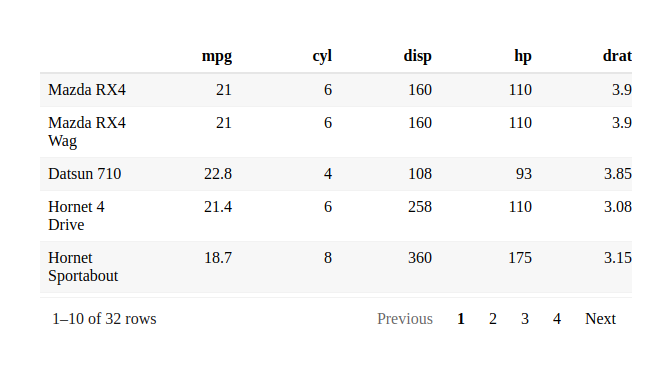

In [ ]:
reactable::reactable(
  mtcars, height = 300, striped = TRUE,
  theme = reactable::reactableTheme(style = list(fontSize = "1rem"))
)

## 表組みいろいろ

-   [reactable](https://glin.github.io/reactable/)
    -   データを後から見返したい時の第一候補
    -   巨大なデータフレームでもさくさくな印象
-   [DT](https://rstudio.github.io/DT/)
    -   数値の範囲などでデータを絞り込みたい時に
    -   巨大なデータフレームに弱い
-   [gt](https://gt.rstudio.com/)
    -   がっつり表を作り込みたい時に

## **renv**でパッケージ管理

パッケージのバージョンに由来する再現しない！を防ぐ

[Rが生産性を高める](https://gihyo.jp/book/2022/978-4-297-12524-0)の第7章でも紹介

[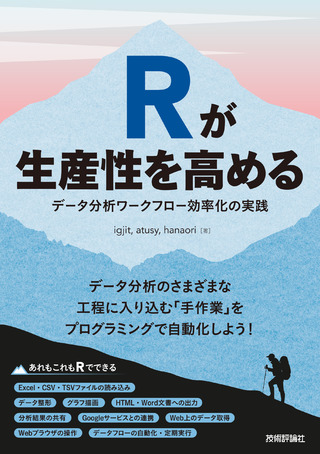](https://gihyo.jp/book/2022/978-4-297-12524-0)

# 拘りの分析ノート作り

## 出力に凝りたい

-   目次が欲しい
    <https://quarto.org/docs/output-formats/html-basics.html#table-of-contents>
-   章番号が欲しい
    <https://quarto.org/docs/output-formats/html-basics.html#section-numbering>
-   チャンクオプション

## バージョン管理

-   バージョン管理
-   GitHubのUI上で結果を確認したい -\> ipynb
-   パッケージング
-   テスト

## 

## 色んな出力形式を使いたい